In [4]:
import pandas as pd 
import numpy as np

In [5]:
data = pd.read_csv("housing.csv")


In [6]:
# Create income categories
data["income_cat"] = pd.cut(data["median_income"],
                             bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf],
                             labels=[1, 2, 3, 4, 5])

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

# Assume income_cat is a column in the dataset created from median_income
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(data, data["income_cat"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [8]:
for sett in (strat_test_set , strat_train_set):
    sett.drop("income_cat" , axis =1 , inplace = True)
    

In [9]:
data  = strat_train_set.copy()

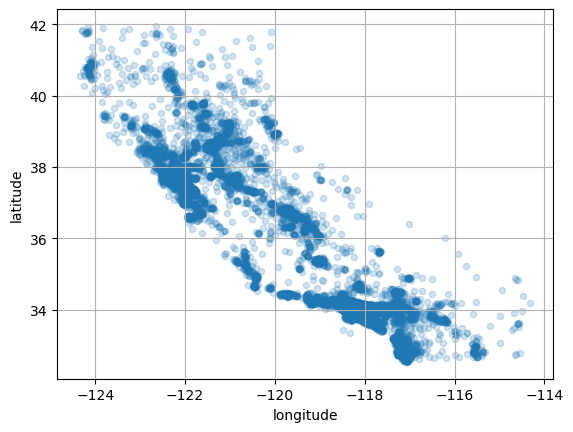

In [10]:
import matplotlib.pyplot as plt
data.plot(kind="scatter", x="longitude", y="latitude", grid=True , alpha=0.2)
plt.show()

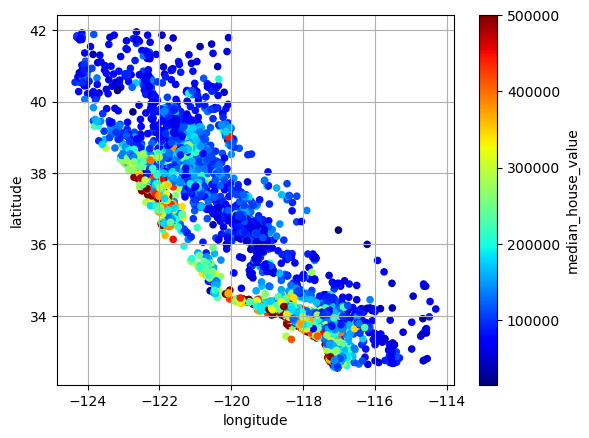

In [14]:
data.plot(kind="scatter", x="longitude", y="latitude", cmap ="jet" , c = "median_house_value" ,grid=True, alpha=1)
plt.show()

In [16]:
data.drop(labels= "ocean_proximity" , inplace =True , axis = 1)
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


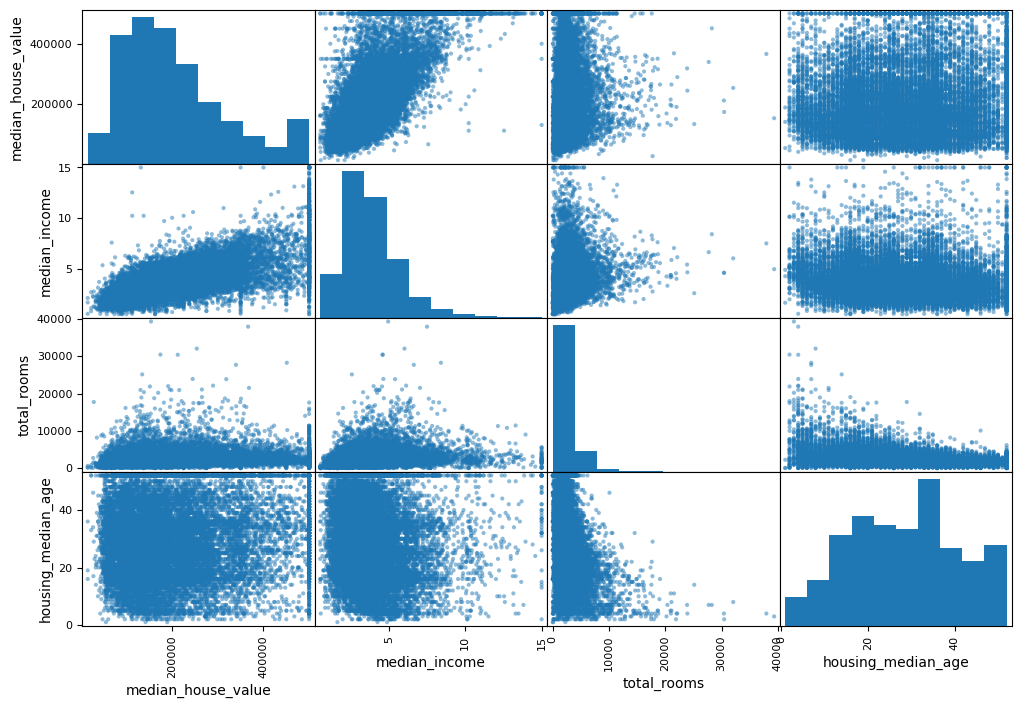

In [18]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(data[attributes], figsize=(12, 8))
plt.show()